L2 and L1 regularization 

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets,transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.models import alexnet,AlexNet_Weights
from torch.utils.data import Dataset,DataLoader,default_collate


In [2]:
weights = AlexNet_Weights.DEFAULT
weights


AlexNet_Weights.IMAGENET1K_V1

In [3]:
def custom_collate(batch):
    max_height = max(sample[0].shape[1] for sample in batch)
    max_width = max(sample[0].shape[2] for sample in batch)

    padded_batch = []
    for sample in batch:
        input_data, target = sample
        pad_height = max_height - input_data.shape[1]
        pad_width = max_width - input_data.shape[2]
        padded_input_data = torch.nn.functional.pad(input_data, (0, pad_width, 0, pad_height))
        padded_batch.append((padded_input_data, target))

    return default_collate(padded_batch)


In [4]:
train_dataset = ImageFolder(root=r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\6th sem\DL_lab\RNN\CNN\cats_and_dogs_filtered\cats_and_dogs_filtered\train',transform=ToTensor(),target_transform=None)
test_dataset = ImageFolder(root=r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\6th sem\DL_lab\RNN\CNN\cats_and_dogs_filtered\cats_and_dogs_filtered\validation',transform=ToTensor())
train_loader = DataLoader(dataset = train_dataset,batch_size = 32,shuffle=True,collate_fn=custom_collate)
test_loader = DataLoader(dataset = test_dataset,batch_size = 32,collate_fn=custom_collate)
class_names = train_dataset.classes
print(f"Number of classes:{len(class_names)}")


Number of classes:2


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [6]:
model = alexnet(weights=weights).to(device)
model


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
from torchinfo import summary
summary(model=model,
        input_size=(32,3,224,224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
AlexNet (AlexNet)                        [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                  [32, 3, 224, 224]    [32, 256, 6, 6]      --                   True
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 64, 55, 55]     23,296               True
│    └─ReLU (1)                          [32, 64, 55, 55]     [32, 64, 55, 55]     --                   --
│    └─MaxPool2d (2)                     [32, 64, 55, 55]     [32, 64, 27, 27]     --                   --
│    └─Conv2d (3)                        [32, 64, 27, 27]     [32, 192, 27, 27]    307,392              True
│    └─ReLU (4)                          [32, 192, 27, 27]    [32, 192, 27, 27]    --                   --
│    └─MaxPool2d (5)                     [32, 192, 27, 27]    [32, 192, 13, 13]    --                   --
│    └─Conv2d (6)     

In [8]:
for param in model.parameters():
    param.requires_grad = False

In [9]:
torch.manual_seed(42)
output_shape = len(class_names)

# Access the last linear layer in the classifier
num_features = model.classifier[6].in_features

# Replace the last linear layer
model.classifier[6] = nn.Sequential(
    nn.Dropout(p=0.2),
    nn.Linear(num_features, output_shape, bias=True)
).to(device)

model


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [10]:
summary(model,
        input_size=(32,3,224,224),
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
AlexNet (AlexNet)                        [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Sequential (features)                  [32, 3, 224, 224]    [32, 256, 6, 6]      --                   False
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 64, 55, 55]     (23,296)             False
│    └─ReLU (1)                          [32, 64, 55, 55]     [32, 64, 55, 55]     --                   --
│    └─MaxPool2d (2)                     [32, 64, 55, 55]     [32, 64, 27, 27]     --                   --
│    └─Conv2d (3)                        [32, 64, 27, 27]     [32, 192, 27, 27]    (307,392)            False
│    └─ReLU (4)                          [32, 192, 27, 27]    [32, 192, 27, 27]    --                   --
│    └─MaxPool2d (5)                     [32, 192, 27, 27]    [32, 192, 13, 13]    --                   --
│    └─Conv2d (6

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=0.001)

In [12]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):
    model.train()
    train_loss,train_acc = 0,0
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):
    model.eval()
    test_loss,test_acc = 0,0
    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device),y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits,y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")
     

torch.manual_seed(42)
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch}:------")
    train_step(model,train_loader,loss_fn,optimizer,device)
    test_step(model,test_loader,loss_fn,device)


Epoch 0:------
Train Loss: 0.4072 | Train Accuracy: 0.8130
Test Loss: 0.2682 | Test Accuracy: 0.8887
Epoch 1:------
Train Loss: 0.3001 | Train Accuracy: 0.8646
Test Loss: 0.2603 | Test Accuracy: 0.8838
Epoch 2:------
Train Loss: 0.2710 | Train Accuracy: 0.8819
Test Loss: 0.2516 | Test Accuracy: 0.8848
Epoch 3:------
Train Loss: 0.2600 | Train Accuracy: 0.8810
Test Loss: 0.2397 | Test Accuracy: 0.9062
Epoch 4:------
Train Loss: 0.2516 | Train Accuracy: 0.8894
Test Loss: 0.2164 | Test Accuracy: 0.9209


In [13]:
manual_optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
lambda_ = 0.001

In [14]:
def manual_train_step(model, dataloader, loss_fn, optimizer, device, lambda_):
    model.train()
    train_loss,train_acc = 0,0
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        l2_reg = 0.0
        for param in model.parameters():
            l2_reg = torch.norm(param,p=2)
        loss += 0.5*lambda_*l2_reg
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += torch.eq(y_pred_class,y).sum().item()/len(y_pred)
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f}")

def manual_test_step(model,dataloader,loss_fn,device):
    model.eval()
    test_loss,test_acc = 0,0
    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device),y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits,y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")        

In [15]:
torch.manual_seed(42)
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    manual_train_step(model, train_loader, loss_fn, manual_optimizer, device, lambda_)
    manual_test_step(model,test_loader,loss_fn,device)

Epoch 1
Train loss: 0.2169 | Train accuracy: 0.9102
Test Loss: 0.2079 | Test Accuracy: 0.9189
Epoch 2
Train loss: 0.2320 | Train accuracy: 0.9023
Test Loss: 0.2738 | Test Accuracy: 0.8691
Epoch 3
Train loss: 0.2130 | Train accuracy: 0.9092
Test Loss: 0.2197 | Test Accuracy: 0.9102
Epoch 4
Train loss: 0.2114 | Train accuracy: 0.9038
Test Loss: 0.2443 | Test Accuracy: 0.9014
Epoch 5
Train loss: 0.2119 | Train accuracy: 0.9043
Test Loss: 0.2035 | Test Accuracy: 0.9209


In [21]:
l1_optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
lambda_ = 0.000
1

1

In [22]:
def manual_l1_train_step(model, dataloader, loss_fn, optimizer, device, lambda_):
    model.train()
    train_loss,train_acc = 0,0
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        l2_reg = 0.0
        for param in model.parameters():
            l2_reg = torch.norm(param,p=2)
        loss += 0.5*lambda_*l2_reg
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += torch.eq(y_pred_class,y).sum().item()/len(y_pred)
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f}")


torch.manual_seed(42)
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    manual_train_step(model, train_loader, loss_fn, l1_optimizer, device, lambda_)
    manual_test_step(model,test_loader,loss_fn,device)



Epoch 1
Train loss: 0.3314 | Train accuracy: 0.8601
Test Loss: 0.2340 | Test Accuracy: 0.9043
Epoch 2
Train loss: 0.2932 | Train accuracy: 0.8705
Test Loss: 0.2405 | Test Accuracy: 0.8936
Epoch 3
Train loss: 0.2663 | Train accuracy: 0.8859
Test Loss: 0.2342 | Test Accuracy: 0.8984
Epoch 4
Train loss: 0.2575 | Train accuracy: 0.8810
Test Loss: 0.2246 | Test Accuracy: 0.9150
Epoch 5
Train loss: 0.2337 | Train accuracy: 0.8968
Test Loss: 0.2088 | Test Accuracy: 0.9219


Compare performance of the dog vs cat model with Dropout and without Dropout 

In [26]:
import torch
from torch import nn
import torchvision
from torchvision import datasets,transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.models import alexnet,AlexNet_Weights
from torch.utils.data import Dataset,DataLoader,default_collate
torch.autograd.set_detect_anomaly(True)



In [27]:
weights = AlexNet_Weights.DEFAULT
weights

AlexNet_Weights.IMAGENET1K_V1

In [28]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [30]:
train_dataset = ImageFolder(root=r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\6th sem\DL_lab\RNN\CNN\cats_and_dogs_filtered\cats_and_dogs_filtered\train',transform=auto_transforms,target_transform=None)
test_dataset = ImageFolder(root=r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\6th sem\DL_lab\RNN\CNN\cats_and_dogs_filtered\cats_and_dogs_filtered\validation',transform=auto_transforms)
train_loader = DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=32)

class_names = train_dataset.classes
output_shape = len(class_names)

In [31]:
model = alexnet(weights=weights).to(device)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [32]:
for param in model.features.parameters():
    param.requires_grad = False

In [33]:
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(
    nn.Dropout(p=0.2), #remove inplace operation
    nn.Linear(in_features=num_features,out_features=output_shape)
).to(device)

In [49]:

'''#summary(model,
        input_size=(32,3,224,224),
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])'''

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
AlexNet (AlexNet)                        [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Sequential (features)                  [32, 3, 224, 224]    [32, 256, 6, 6]      --                   False
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 64, 55, 55]     (23,296)             False
│    └─ReLU (1)                          [32, 64, 55, 55]     [32, 64, 55, 55]     --                   --
│    └─MaxPool2d (2)                     [32, 64, 55, 55]     [32, 64, 27, 27]     --                   --
│    └─Conv2d (3)                        [32, 64, 27, 27]     [32, 192, 27, 27]    (307,392)            False
│    └─ReLU (4)                          [32, 192, 27, 27]    [32, 192, 27, 27]    --                   --
│    └─MaxPool2d (5)                     [32, 192, 27, 27]    [32, 192, 13, 13]    --                   --
│    └─Conv2d (6

In [34]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [35]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):
    model.train()
    train_loss,train_acc = 0,0
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    #print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    return train_loss,train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):
    model.eval()
    test_loss,test_acc = 0,0
    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device),y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits,y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        #print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")
        return test_loss,test_acc


In [36]:
def train_dropout(model, train_loader, test_loader, loss_fn, optimizer, device, dropout_prob=0.5):
    num_epochs = 5
    model.to(device)
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    for epoch in range(num_epochs):
        if dropout_prob > 0:
            print(f"Epoch:{epoch}---- Dropout Applied")
        else:
            print(f"Epoch:{epoch}---- No Dropout Applied")
        train_loss, train_acc = train_step(model, train_loader, loss_fn, optimizer, device)
        test_loss, test_acc = test_step(model, test_loader, loss_fn, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        print(f"Train Loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f}")
        print(f"Test Loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")
    return train_losses, train_accs, test_losses, test_accs

def train_no_dropout(model, train_loader, test_loader, loss_fn, optimizer, device, dropout_prob=0):
    print("No Dropout Applied")
    return train_dropout(model, train_loader, test_loader, loss_fn, optimizer, device, dropout_prob=0)


In [37]:
torch.manual_seed(42)


train_losses, train_accs, test_losses, test_accs = train_dropout(model, train_loader, test_loader, loss_fn, optimizer, device)
ndp_train_losses, ndp_train_accs, ndp_test_losses, ndp_test_accs = train_no_dropout(model, train_loader, test_loader, loss_fn, optimizer, device)


Epoch:0---- Dropout Applied
Train Loss: 0.6580 | Train accuracy: 0.8730
Test Loss: 0.1457 | Test accuracy: 0.9580
Epoch:1---- Dropout Applied
Train Loss: 0.3007 | Train accuracy: 0.9420
Test Loss: 0.1829 | Test accuracy: 0.9502
Epoch:2---- Dropout Applied
Train Loss: 0.1629 | Train accuracy: 0.9663
Test Loss: 0.3769 | Test accuracy: 0.9521
Epoch:3---- Dropout Applied
Train Loss: 0.2787 | Train accuracy: 0.9549
Test Loss: 0.5180 | Test accuracy: 0.9375
Epoch:4---- Dropout Applied
Train Loss: 0.2941 | Train accuracy: 0.9568
Test Loss: 0.7254 | Test accuracy: 0.9170
No Dropout Applied
Epoch:0---- No Dropout Applied
Train Loss: 0.1501 | Train accuracy: 0.9732
Test Loss: 0.1524 | Test accuracy: 0.9551
Epoch:1---- No Dropout Applied
Train Loss: 0.1622 | Train accuracy: 0.9752
Test Loss: 0.2532 | Test accuracy: 0.9521
Epoch:2---- No Dropout Applied
Train Loss: 0.1224 | Train accuracy: 0.9812
Test Loss: 0.2457 | Test accuracy: 0.9561
Epoch:3---- No Dropout Applied
Train Loss: 0.0973 | Train ac

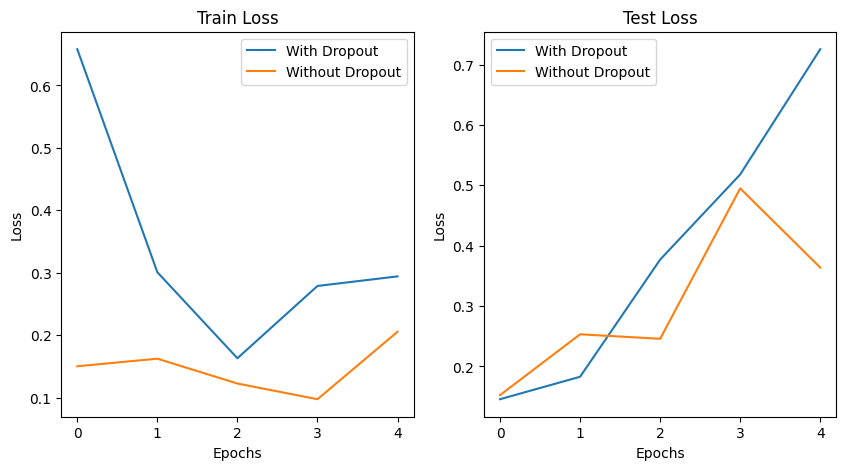

In [38]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(0,5), train_losses, label='With Dropout')
plt.plot(range(0,5), ndp_train_losses, label='Without Dropout')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(0,5), test_losses, label='With Dropout')
plt.plot(range(0,5), ndp_test_losses, label='Without Dropout')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     


Implementing Bernoulli dropout using torch library and without torch library

In [2]:
import numpy as np

class CustomDropout:
    def __init__(self, dropout_prob):
        self.dropout_prob = dropout_prob
        self.dropout_mask = None

    def forward(self, x):
            self.dropout_mask = np.random.binomial(n=1, p=1 - self.dropout_prob, size=x.shape) / (1 - self.dropout_prob)
            return x * self.dropout_mask

dropout_layer = CustomDropout(dropout_prob=0.5)

input_data = np.random.randn(10, 5)  
output = dropout_layer.forward(input_data)
print(output)

[[-3.61462109 -1.8845617  -0.         -0.         -0.        ]
 [-0.          0.          0.         -0.44973268 -1.08992283]
 [ 2.85354545  2.01978397  0.         -1.99855558  3.37936203]
 [ 0.         -0.         -0.         -0.         -0.        ]
 [ 0.         -0.         -0.         -0.         -0.        ]
 [-0.          0.92328272 -2.79390361 -2.74344786 -0.55331896]
 [-0.96608659 -0.         -0.          2.02898245 -0.25945227]
 [-2.27769519  0.         -0.         -0.         -0.        ]
 [ 2.18716075 -1.78573551 -0.         -0.96189746  0.        ]
 [ 0.1866142  -1.77061937  0.          0.          0.        ]]
[[ 0.55608552 -0.20590661  0.66842261  0.89208616  0.74684648]
 [-1.50206133 -1.65667301 -1.10274919 -0.29610194 -0.29896046]
 [ 2.50652635 -0.16298983  0.45410624 -1.32237379  1.21575856]
 [ 1.12273986 -2.1001268   0.15527431 -1.95941489  0.37040391]
 [ 0.06362732  1.65579703 -1.56662409  0.27046628  0.9007608 ]
 [-0.20298292  0.06910731  1.49700551 -0.4425765  -1.3

In [5]:
import torch
tensor = torch.ones(100)
print(tensor)
dropout_mask = torch.bernoulli(torch.full_like(tensor, fill_value=0.9))
output = tensor * dropout_mask / 0.9
print(output)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([1.1111, 1.1111, 0.0000, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111,
        1.1111, 1.1111, 0.0000, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 0.0000,
        1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 0.0000, 1.1111, 1.1111, 1.1111,
        1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111,
        1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111,
        1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111,
        1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111, 1.1111,

Implement Early stopping

In [7]:
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
train_data = datasets.MNIST(root='data',download=True,train=True,transform=transforms.ToTensor(),target_transform=None)
test_data = datasets.MNIST(root='data',download=True,train=False,transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=32,shuffle=True)
class_names = train_data.classes 

In [12]:
class CNNModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1, 
                      padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model = CNNModel(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model


CNNModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [17]:
patience = 5
best_validation_loss = float('inf')
current_patience = 0
epochs = 10

for epoch in range(epochs):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += torch.eq(y_pred_class, y).sum().item() / len(y_pred)
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_loader):
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_pred_labels = test_pred.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

        if test_loss < best_validation_loss:
            best_validation_loss = test_loss
            current_patience = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            current_patience += 1

        if current_patience > patience:
            print("Early stopping! No improvement for {} epochs.".format(patience))
            break

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Epoch 1:
Train Loss: 0.0325 | Train Accuracy: 0.9896
Test Loss: 0.0403 | Test Accuracy: 0.9876
Epoch 2:
Train Loss: 0.0295 | Train Accuracy: 0.9906
Test Loss: 0.0401 | Test Accuracy: 0.9874
Epoch 3:
Train Loss: 0.0271 | Train Accuracy: 0.9912
Test Loss: 0.0374 | Test Accuracy: 0.9883
Epoch 4:
Train Loss: 0.0245 | Train Accuracy: 0.9918
Test Loss: 0.0340 | Test Accuracy: 0.9885
Epoch 5:
Train Loss: 0.0229 | Train Accuracy: 0.9922
Test Loss: 0.0452 | Test Accuracy: 0.9871
Epoch 6:
Train Loss: 0.0219 | Train Accuracy: 0.9926
Test Loss: 0.0399 | Test Accuracy: 0.9890
Epoch 7:
Train Loss: 0.0197 | Train Accuracy: 0.9937
Test Loss: 0.0491 | Test Accuracy: 0.9864
Epoch 8:
Train Loss: 0.0183 | Train Accuracy: 0.9942
Test Loss: 0.0386 | Test Accuracy: 0.9892
Epoch 9:
Train Loss: 0.0177 | Train Accuracy: 0.9939
Test Loss: 0.0431 | Test Accuracy: 0.9899
Early stopping! No improvement for 5 epochs.
